In [1]:
suppressPackageStartupMessages(suppressWarnings(library(ggplot2))) # plotting
suppressPackageStartupMessages(suppressWarnings(library(dplyr))) # data manipulation
suppressPackageStartupMessages(suppressWarnings(library(argparser))) # command line arguments
suppressPackageStartupMessages(suppressWarnings(library(patchwork))) # plot patchwork
suppressPackageStartupMessages(suppressWarnings(library(reshape2))) # data manipulation
suppressPackageStartupMessages(suppressWarnings(library(ggridges))) # ridgeline plots
suppressPackageStartupMessages(suppressWarnings(library(RColorBrewer))) # color palettes
suppressPackageStartupMessages(suppressWarnings(library(cowplot))) # ggplot2 drawing
suppressPackageStartupMessages(suppressWarnings(library(ggplotify))) # ggplot2 drawing
suppressPackageStartupMessages(suppressWarnings(library(grid()))) # ggplot2 drawing

source("../../utils/figure_themes.r")


## single cell predictions 

In [2]:
CELL_TYPE = "PBMC"

In [3]:
# define main_df_path
main_df_path = paste0("../results/", CELL_TYPE, "/","single_cell_predictions.parquet")

# read in data
main_df = arrow::read_parquet(main_df_path)
head(main_df)
unique(main_df$comparison)

oneb_Metadata_Treatment_Dose_Inhibitor_Dose,Metadata_Nuclei_Location_Center_Y,Metadata_Nuclei_Location_Center_X,group,Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1,Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1,Cytoplasm_AreaShape_Zernike_9_5,Metadata_Well,Metadata_Site,Metadata_ImageNumber,⋯,image_ER_path,image_GasderminD_path,image_AGP_path,image_Mitochondria_path,image_compsite_crop_path,image_DAPI_crop_path,image_ER_crop_path,image_GasderminD_crop_path,image_AGP_crop_path,image_Mitochondria_crop_path
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Disulfiram_1.000_uM_DMSO_0.025_%,1934.7651,204.7915,Control,-0.3668830,1.7325933,-0.6595971,F10,4,132,⋯,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_yellow_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_green_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_red_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_magenta_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/composite_images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_im1_im3_im4_composite_image_crop_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_blue_channel_crop_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_yellow_channel_crop_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_green_channel_crop_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_red_channel_crop_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_magenta_channel_crop_cell.png
Thapsigargin_1.000_uM_DMSO_0.025_%,597.5306,1401.2653,Apoptosis,-0.8757575,1.7325879,0.7167819,D06,4,68,⋯,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/apoptosis__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_yellow_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/apoptosis__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_green_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/apoptosis__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_red_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/apoptosis__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_magenta_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/composite_images/PBMC/apoptosis__control_pyroptosis__Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1_im1_im3_im4_composite_image_crop_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/P

[1] "control_pyroptosis"   "apoptosis_control"    "apoptosis_pyroptosis"

In [4]:
# split the df by comparison
control_pyroptosis <- main_df %>% filter(comparison == "control_pyroptosis")    
apoptosis_control <- main_df %>% filter(comparison == "apoptosis_control")
apoptosis_pyroptosis <- main_df %>% filter(comparison == "apoptosis_pyroptosis")
length((control_pyroptosis$comparison))
length((apoptosis_control$comparison))
length((apoptosis_pyroptosis$comparison))

[1] 3

[1] 3

[1] 3

In [5]:
apoptosis_pyroptosis

oneb_Metadata_Treatment_Dose_Inhibitor_Dose,Metadata_Nuclei_Location_Center_Y,Metadata_Nuclei_Location_Center_X,group,Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1,Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1,Cytoplasm_AreaShape_Zernike_9_5,Metadata_Well,Metadata_Site,Metadata_ImageNumber,⋯,image_ER_path,image_GasderminD_path,image_AGP_path,image_Mitochondria_path,image_compsite_crop_path,image_DAPI_crop_path,image_ER_crop_path,image_GasderminD_crop_path,image_AGP_crop_path,image_Mitochondria_crop_path
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Disulfiram_1.000_uM_DMSO_0.025_%,1004.3040,1408.7102,Control,1.693909,0.3015675,0.08832598,F05,1,49,⋯,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_yellow_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_green_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_red_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_magenta_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/composite_images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_im1_im3_im4_composite_image_crop_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_blue_channel_crop_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_yellow_channel_crop_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_green_channel_crop_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_red_channel_crop_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_magenta_channel_crop_cell.png
Thapsigargin_10.000_uM_DMSO_0.025_%,1128.1910,618.3026,Apoptosis,1.693857,1.1396619,-0.20518721,E06,5,245,⋯,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/apoptosis__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_yellow_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/apoptosis__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_green_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/apoptosis__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_red_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/apoptosis__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_magenta_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/composite_images/PBMC/apoptosis__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_im1_im3_im4_composite_image_crop_cell.png,/home/lip

In [6]:
# define empty dictionary
dict_of_features = {}
dict_of_groups = {}
dict_of_all = {}

In [7]:
width <- 2
height <- 2
options(repr.plot.width = width, repr.plot.height = height)
# define function to return the image object
get_image <- function(df, i){
    # Load the PNG file
    img <- png::readPNG(df$image_compsite_crop_path[i])
    # Convert the image to a raster object
    g <- grid::rasterGrob(img, interpolate=TRUE)

    # Create a ggplot
    p <- ggplot() +
    annotation_custom(g, xmin=-Inf, xmax=Inf, ymin=-Inf, ymax=Inf) +
    theme_void()  # Remove axes and labels

    # Print the plot
    return(p)
}


#add titlecontrol_pyroptosis
add_title <- function(plot, title){
    plot + ggtitle(title) + theme(plot.title = element_text(size = 14, hjust = 0.5))
}

In [8]:
# split the feature column into separate columns
control_pyroptosis <- control_pyroptosis %>%
    tidyr::separate(
        feature,
        into = c(
            "compartment",
            "feature_group",
            "measurement",
            "channel", 
            "parameter1", 
            "parameter2"
        ),
        sep = "_",
        remove = FALSE
    ) %>%
    dplyr::mutate(channel_cleaned = channel)
    # Clean channel for visualization
control_pyroptosis$channel_learned <- dplyr::recode(control_pyroptosis$channel,
            "CorrDNA" = "Nuclei",
            "CorrMito" = "Mito",
            "CorrER" = "ER",
            "CorrGasdermin" = "Gasdermin D",
            "CorrPM" = "PM",
            .default = "other",
            .missing="other"
    )
# split the feature column into separate columns
apoptosis_control <- apoptosis_control %>%
    tidyr::separate(
        feature,
        into = c(
            "compartment",
            "feature_group",
            "measurement",
            "channel", 
            "parameter1", 
            "parameter2"
        ),
        sep = "_",
        remove = FALSE
    ) %>%
    dplyr::mutate(channel_cleaned = channel)
    # Clean channel for visualization
apoptosis_control$channel_learned <- dplyr::recode(apoptosis_control$channel,
            "CorrDNA" = "Nuclei",
            "CorrMito" = "Mito",
            "CorrER" = "ER",
            "CorrGasdermin" = "Gasdermin D",
            "CorrPM" = "PM",
            .default = "other",
            .missing="other"
    )


# split the feature column into separate columns
apoptosis_pyroptosis <- apoptosis_pyroptosis %>%
    tidyr::separate(
        feature,
        into = c(
            "compartment",
            "feature_group",
            "measurement",
            "channel", 
            "parameter1", 
            "parameter2"
        ),
        sep = "_",
        remove = FALSE
    ) %>%
    dplyr::mutate(channel_cleaned = channel)
    # Clean channel for visualization
apoptosis_pyroptosis$channel_learned <- dplyr::recode(apoptosis_pyroptosis$channel,
            "CorrDNA" = "Nuclei",
            "CorrMito" = "Mito",
            "CorrER" = "ER",
            "CorrGasdermin" = "Gasdermin D",
            "CorrPM" = "PM",
            .default = "other",
            .missing="other"
    )


Warning message:
“Expected 6 pieces. Missing pieces filled with `NA` in 3 rows [1, 2, 3].”


In [9]:
# change the text in the dfs
control_pyroptosis$comparison <- "Control vs. Pyroptosis"
apoptosis_control$comparison <- "Apoptosis vs. Control"
apoptosis_pyroptosis$comparison <- "Apoptosis vs. Pyroptosis"

### Pyroptosis vs Control features

In [10]:
# loop through the rows of the df and plot the images
list_of_plots_control_pyroptosis <- c()
for (i in 1:nrow(control_pyroptosis)){
    list_of_plots_control_pyroptosis[[i]] <- get_image(control_pyroptosis, i)
}

# get the subtitle from each item in the list
ggplot_objects_control_pyroptosis <- Map(
    add_title,
    plot = list_of_plots_control_pyroptosis,
    title = (
        paste0(control_pyroptosis$comparison, "\n", 
        control_pyroptosis$Group, "\n", 
        control_pyroptosis$compartment, "\n",
        control_pyroptosis$feature_group, "\n",
        control_pyroptosis$measurement, "\n",
        control_pyroptosis$channel_cleaned
        
        )))



Warning message:
“Unknown or uninitialised column: `Group`.”


### Apoptosis vs Control features

In [11]:
# loop through the rows of the df and plot the images
list_of_plots_apoptosis_control <- c()
for (i in 1:nrow(apoptosis_control)){
    list_of_plots_apoptosis_control[[i]] <- get_image(apoptosis_control, i)
}

# get the subtitle from each item in the list
ggplot_objects_apoptosis_control <- Map(
    add_title,
    plot = list_of_plots_apoptosis_control,
    title = (
        paste0(apoptosis_control$comparison, "\n", 
        apoptosis_control$Group, "\n", 
        apoptosis_control$compartment, "\n",
        apoptosis_control$feature_group, "\n",
        apoptosis_control$measurement        
        )))

length(ggplot_objects_apoptosis_control)

Warning message:
“Unknown or uninitialised column: `Group`.”


[1] 3

In [12]:
apoptosis_pyroptosis

oneb_Metadata_Treatment_Dose_Inhibitor_Dose,Metadata_Nuclei_Location_Center_Y,Metadata_Nuclei_Location_Center_X,group,Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1,Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1,Cytoplasm_AreaShape_Zernike_9_5,Metadata_Well,Metadata_Site,Metadata_ImageNumber,⋯,image_AGP_path,image_Mitochondria_path,image_compsite_crop_path,image_DAPI_crop_path,image_ER_crop_path,image_GasderminD_crop_path,image_AGP_crop_path,image_Mitochondria_crop_path,channel_cleaned,channel_learned
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Disulfiram_1.000_uM_DMSO_0.025_%,1004.3040,1408.7102,Control,1.693909,0.3015675,0.08832598,F05,1,49,⋯,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_red_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_magenta_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/composite_images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_im1_im3_im4_composite_image_crop_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_blue_channel_crop_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_yellow_channel_crop_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_green_channel_crop_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_red_channel_crop_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_magenta_channel_crop_cell.png,CorrGasdermin,Gasdermin D
Thapsigargin_10.000_uM_DMSO_0.025_%,1128.1910,618.3026,Apoptosis,1.693857,1.1396619,-0.20518721,E06,5,245,⋯,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/apoptosis__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_red_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/apoptosis__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_magenta_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/composite_images/PBMC/apoptosis__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_im1_im3_im4_composite_image_crop_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/apoptosis__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_blue_channel_crop_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/apoptosis__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_yellow_channel_crop_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/apoptosis__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_green_channel_crop_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/apoptosis__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasderm

### Apoptosis vs Pyroptosis features

In [13]:
list_of_plots_apoptosis_pyroptosis <- c()
for (i in 1:nrow(apoptosis_pyroptosis)){
    list_of_plots_apoptosis_pyroptosis[[i]] <- get_image(apoptosis_pyroptosis, i)
}

# get the subtitle from each item in the list
ggplot_objects_apoptosis_pyroptosis <- Map(
    add_title,
    plot = list_of_plots_apoptosis_pyroptosis,
    title = (
        paste0(apoptosis_pyroptosis$comparison, "\n", 
        apoptosis_pyroptosis$Group, "\n", 
        apoptosis_pyroptosis$compartment, "\n",
        apoptosis_pyroptosis$feature_group, "\n",
        apoptosis_pyroptosis$measurement, "\n",
        apoptosis_pyroptosis$channel_cleaned
        
        )))

length(ggplot_objects_apoptosis_pyroptosis)
length(ggplot_objects_control_pyroptosis)
length(ggplot_objects_apoptosis_control)

Warning message:
“Unknown or uninitialised column: `Group`.”


[1] 3

[1] 3

[1] 3

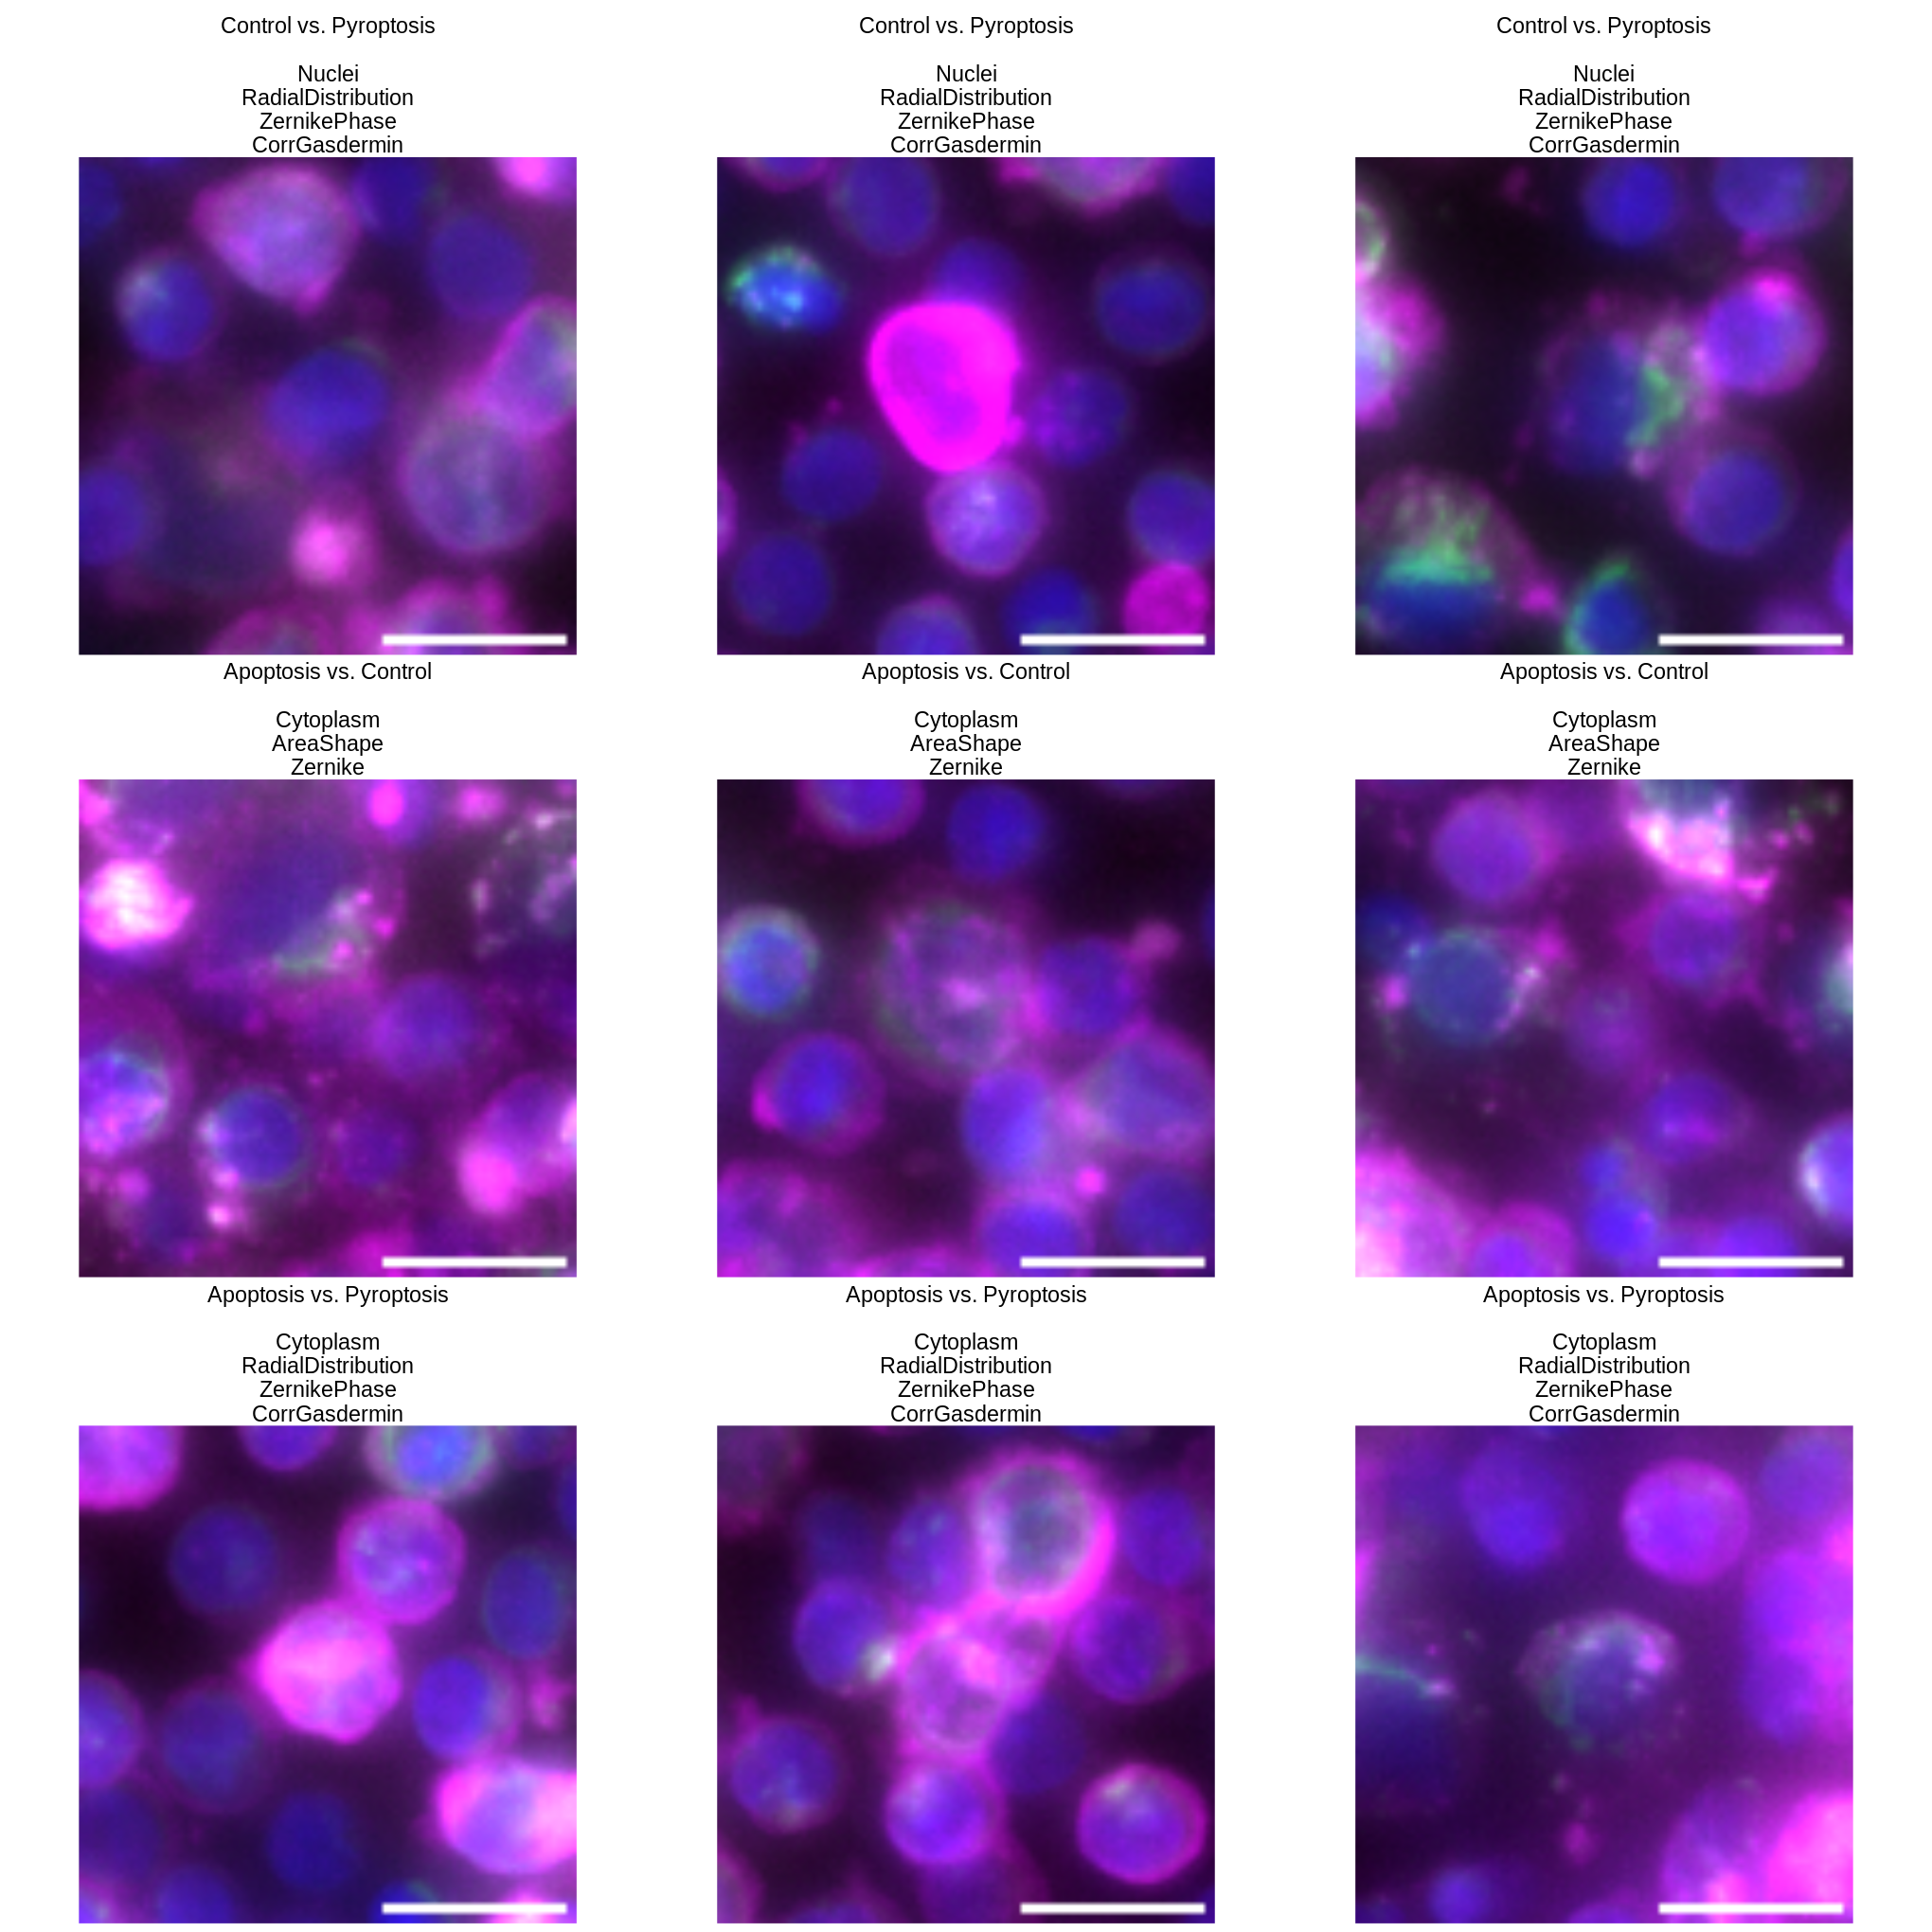

In [14]:
width <- 17
height <-17
options(repr.plot.width = width, repr.plot.height = height)
# stich the images together
control_pyroptosis_images <- (
    # plot image with 
    ggplot_objects_control_pyroptosis[[1]]
    + ggplot_objects_control_pyroptosis[[2]]
    + ggplot_objects_control_pyroptosis[[3]]

    + ggplot_objects_apoptosis_control[[1]]
    + ggplot_objects_apoptosis_control[[2]]
    + ggplot_objects_apoptosis_control[[3]]

    + ggplot_objects_apoptosis_pyroptosis[[1]]
    + ggplot_objects_apoptosis_pyroptosis[[2]]
    + ggplot_objects_apoptosis_pyroptosis[[3]]
   
    + plot_layout(ncol = 3)
)
control_pyroptosis_images
# save the image
ggsave(
    file.path(
        paste0(
            "../figures/",CELL_TYPE,"_anova_images_compisite.png"
        )
    ),
    control_pyroptosis_images, width = width, height = height, dpi = 600
)

Single channel + composite montage apooptosis vs pyroptosis


In [15]:
# get the column names from the df
apoptosis_pyroptosis

oneb_Metadata_Treatment_Dose_Inhibitor_Dose,Metadata_Nuclei_Location_Center_Y,Metadata_Nuclei_Location_Center_X,group,Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1,Nuclei_RadialDistribution_ZernikePhase_CorrGasdermin_3_1,Cytoplasm_AreaShape_Zernike_9_5,Metadata_Well,Metadata_Site,Metadata_ImageNumber,⋯,image_AGP_path,image_Mitochondria_path,image_compsite_crop_path,image_DAPI_crop_path,image_ER_crop_path,image_GasderminD_crop_path,image_AGP_crop_path,image_Mitochondria_crop_path,channel_cleaned,channel_learned
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Disulfiram_1.000_uM_DMSO_0.025_%,1004.3040,1408.7102,Control,1.693909,0.3015675,0.08832598,F05,1,49,⋯,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_red_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_magenta_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/composite_images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_im1_im3_im4_composite_image_crop_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_blue_channel_crop_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_yellow_channel_crop_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_green_channel_crop_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_red_channel_crop_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/control__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_magenta_channel_crop_cell.png,CorrGasdermin,Gasdermin D
Thapsigargin_10.000_uM_DMSO_0.025_%,1128.1910,618.3026,Apoptosis,1.693857,1.1396619,-0.20518721,E06,5,245,⋯,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/apoptosis__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_red_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/apoptosis__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_magenta_channel_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/composite_images/PBMC/apoptosis__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_im1_im3_im4_composite_image_crop_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/apoptosis__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_blue_channel_crop_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/apoptosis__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_yellow_channel_crop_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/apoptosis__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasdermin_9_1_green_channel_crop_cell.png,/home/lippincm/Documents/ML/Interstellar_Analysis/figures/3.figure3/figures/images/PBMC/apoptosis__apoptosis_pyroptosis__Cytoplasm_RadialDistribution_ZernikePhase_CorrGasderm

In [16]:
load_image <- function(path){
    img <- png::readPNG(path)
    # Convert the image to a raster object
    g <- grid::rasterGrob(img, interpolate=TRUE)

    # Create a ggplot
    p <- ggplot() +
    annotation_custom(g, xmin=-Inf, xmax=Inf, ymin=-Inf, ymax=Inf) +
    theme_void()
    return(p)
}


In [17]:
control_dapi_image_path <- apoptosis_pyroptosis$image_DAPI_crop_path[1]
control_er_path <- apoptosis_pyroptosis$image_ER_crop_path[1]
control_gasdermin_path <- apoptosis_pyroptosis$image_GasderminD_crop_path[1]
control_pm_path <- apoptosis_pyroptosis$image_AGP_crop_path[1]
control_mito_path <- apoptosis_pyroptosis$image_Mitochondria_crop_path[1]

apoptosis_dapi_image_path <- apoptosis_pyroptosis$image_DAPI_crop_path[2]
apoptosis_er_path <- apoptosis_pyroptosis$image_ER_crop_path[2]
apoptosis_gasdermin_path <- apoptosis_pyroptosis$image_GasderminD_crop_path[2]
apoptosis_pm_path <- apoptosis_pyroptosis$image_AGP_crop_path[2]
apoptosis_mito_path <- apoptosis_pyroptosis$image_Mitochondria_crop_path[2]

pyroptosis_dapi_image_path <- apoptosis_pyroptosis$image_DAPI_crop_path[3]
pyroptosis_er_path <- apoptosis_pyroptosis$image_ER_crop_path[3]
pyroptosis_gasdermin_path <- apoptosis_pyroptosis$image_GasderminD_crop_path[3]
pyroptosis_pm_path <- apoptosis_pyroptosis$image_AGP_crop_path[3]
pyroptosis_mito_path <- apoptosis_pyroptosis$image_Mitochondria_crop_path[3]

control_composite_path <- apoptosis_pyroptosis$image_compsite_crop_path[1]
apoptosis_composite_path <- apoptosis_pyroptosis$image_compsite_crop_path[2]
pyroptosis_composite_path <- apoptosis_pyroptosis$image_compsite_crop_path[3]

# load images 
control_dapi_image <- load_image(control_dapi_image_path)
control_er_image <- load_image(control_er_path)
control_gasdermin_image <- load_image(control_gasdermin_path)
control_pm_image <- load_image(control_pm_path)
control_mito_image <- load_image(control_mito_path)

apoptosis_dapi_image <- load_image(apoptosis_dapi_image_path)
apoptosis_er_image <- load_image(apoptosis_er_path)
apoptosis_gasdermin_image <- load_image(apoptosis_gasdermin_path)
apoptosis_pm_image <- load_image(apoptosis_pm_path)
apoptosis_mito_image <- load_image(apoptosis_mito_path)

pyroptosis_dapi_image <- load_image(pyroptosis_dapi_image_path)
pyroptosis_er_image <- load_image(pyroptosis_er_path)
pyroptosis_gasdermin_image <- load_image(pyroptosis_gasdermin_path)
pyroptosis_pm_image <- load_image(pyroptosis_pm_path)
pyroptosis_mito_image <- load_image(pyroptosis_mito_path)

control_composite_image <- load_image(control_composite_path)
apoptosis_composite_image <- load_image(apoptosis_composite_path)
pyroptosis_composite_image <- load_image(pyroptosis_composite_path)

# list of images
list_of_images <- list(
    control_dapi_image,
    control_er_image,
    control_gasdermin_image,
    control_pm_image,
    control_mito_image,
    control_composite_image,


    apoptosis_dapi_image,
    apoptosis_er_image,
    apoptosis_gasdermin_image,
    apoptosis_pm_image,
    apoptosis_mito_image,
    apoptosis_composite_image,

    pyroptosis_dapi_image,
    pyroptosis_er_image,
    pyroptosis_gasdermin_image,
    pyroptosis_pm_image,
    pyroptosis_mito_image,
    pyroptosis_composite_image
)



In [18]:
# patchwork the images together
width <- 17
height <- 5

options(repr.plot.width = width, repr.plot.height = height)

# stich the images together
control_images <- (
    # plot image with 
    list_of_images[[1]]
    + list_of_images[[2]]
    + list_of_images[[3]]
    + list_of_images[[4]]
    + list_of_images[[5]]
    + list_of_images[[6]]
    + plot_layout(nrow = 1)
)
apotosis_images <- (
    # plot image with 
    list_of_images[[7]]
    + list_of_images[[8]]
    + list_of_images[[9]]
    + list_of_images[[10]]
    + list_of_images[[11]]
    + list_of_images[[12]]
    + plot_layout(nrow = 1)
)
pyroptosis_images <- (
    # plot image with 
    list_of_images[[13]]
    + list_of_images[[14]]
    + list_of_images[[15]]
    + list_of_images[[16]]
    + list_of_images[[17]]
    + list_of_images[[18]]
    + plot_layout(nrow = 1)
)


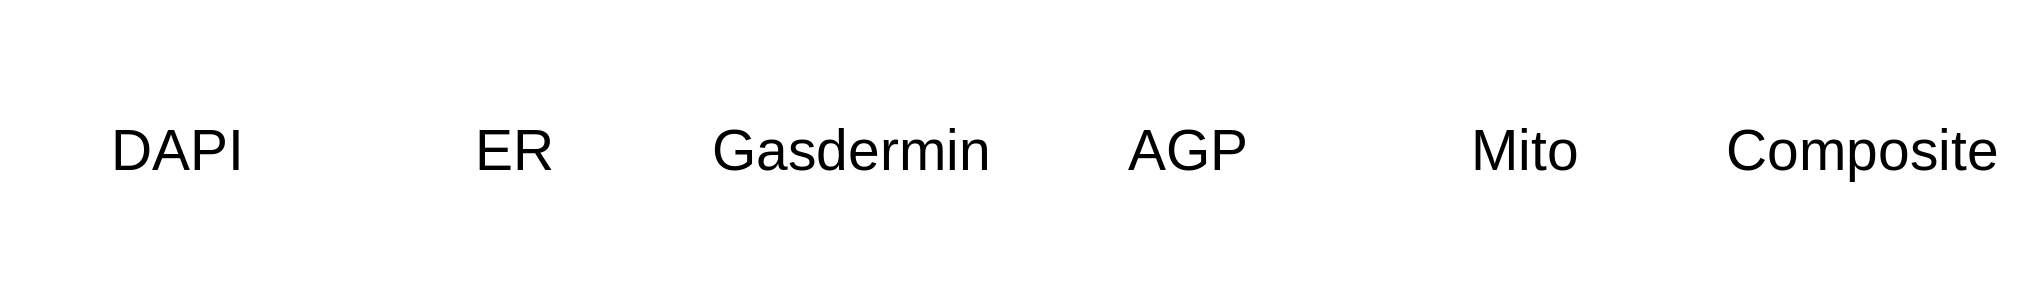

In [19]:
width <- 2.5
height <- 2.5

text_size <- 12

options(repr.plot.width = width, repr.plot.height = height)

# ggplot of just text
dapi_text <- (
    ggplot()
    + geom_text(aes(x = 0.5, y = 0.5, label = "DAPI"), size = text_size) 
    + theme_void()
)
er_text <- (
    ggplot()
    + geom_text(aes(x = 0.5, y = 0.5, label = "ER"), size = text_size) 
    + theme_void()
)
Gasdermin_text <- (
    ggplot()
    + geom_text(aes(x = 0.5, y = 0.5, label = "Gasdermin"), size = text_size) 
    + theme_void()
)
pm_text <- (
    ggplot()
    + geom_text(aes(x = 0.5, y = 0.5, label = "AGP"), size = text_size) 
    + theme_void()
)
mito_text <- (
    ggplot()
    + geom_text(aes(x = 0.5, y = 0.5, label = "Mito"), size = text_size) 
    + theme_void()
)
composite_text <- (
    ggplot()
    + geom_text(aes(x = 0.5, y = 0.5, label = "Composite"), size = text_size) 
    + theme_void()
)

# patch text together
patch_text <- (
    dapi_text
    + er_text
    + Gasdermin_text
    + pm_text
    + mito_text
    + composite_text
    + plot_layout(nrow = 1)
)
width <- 17
height <- 2.5

options(repr.plot.width = width, repr.plot.height = height)


patch_text

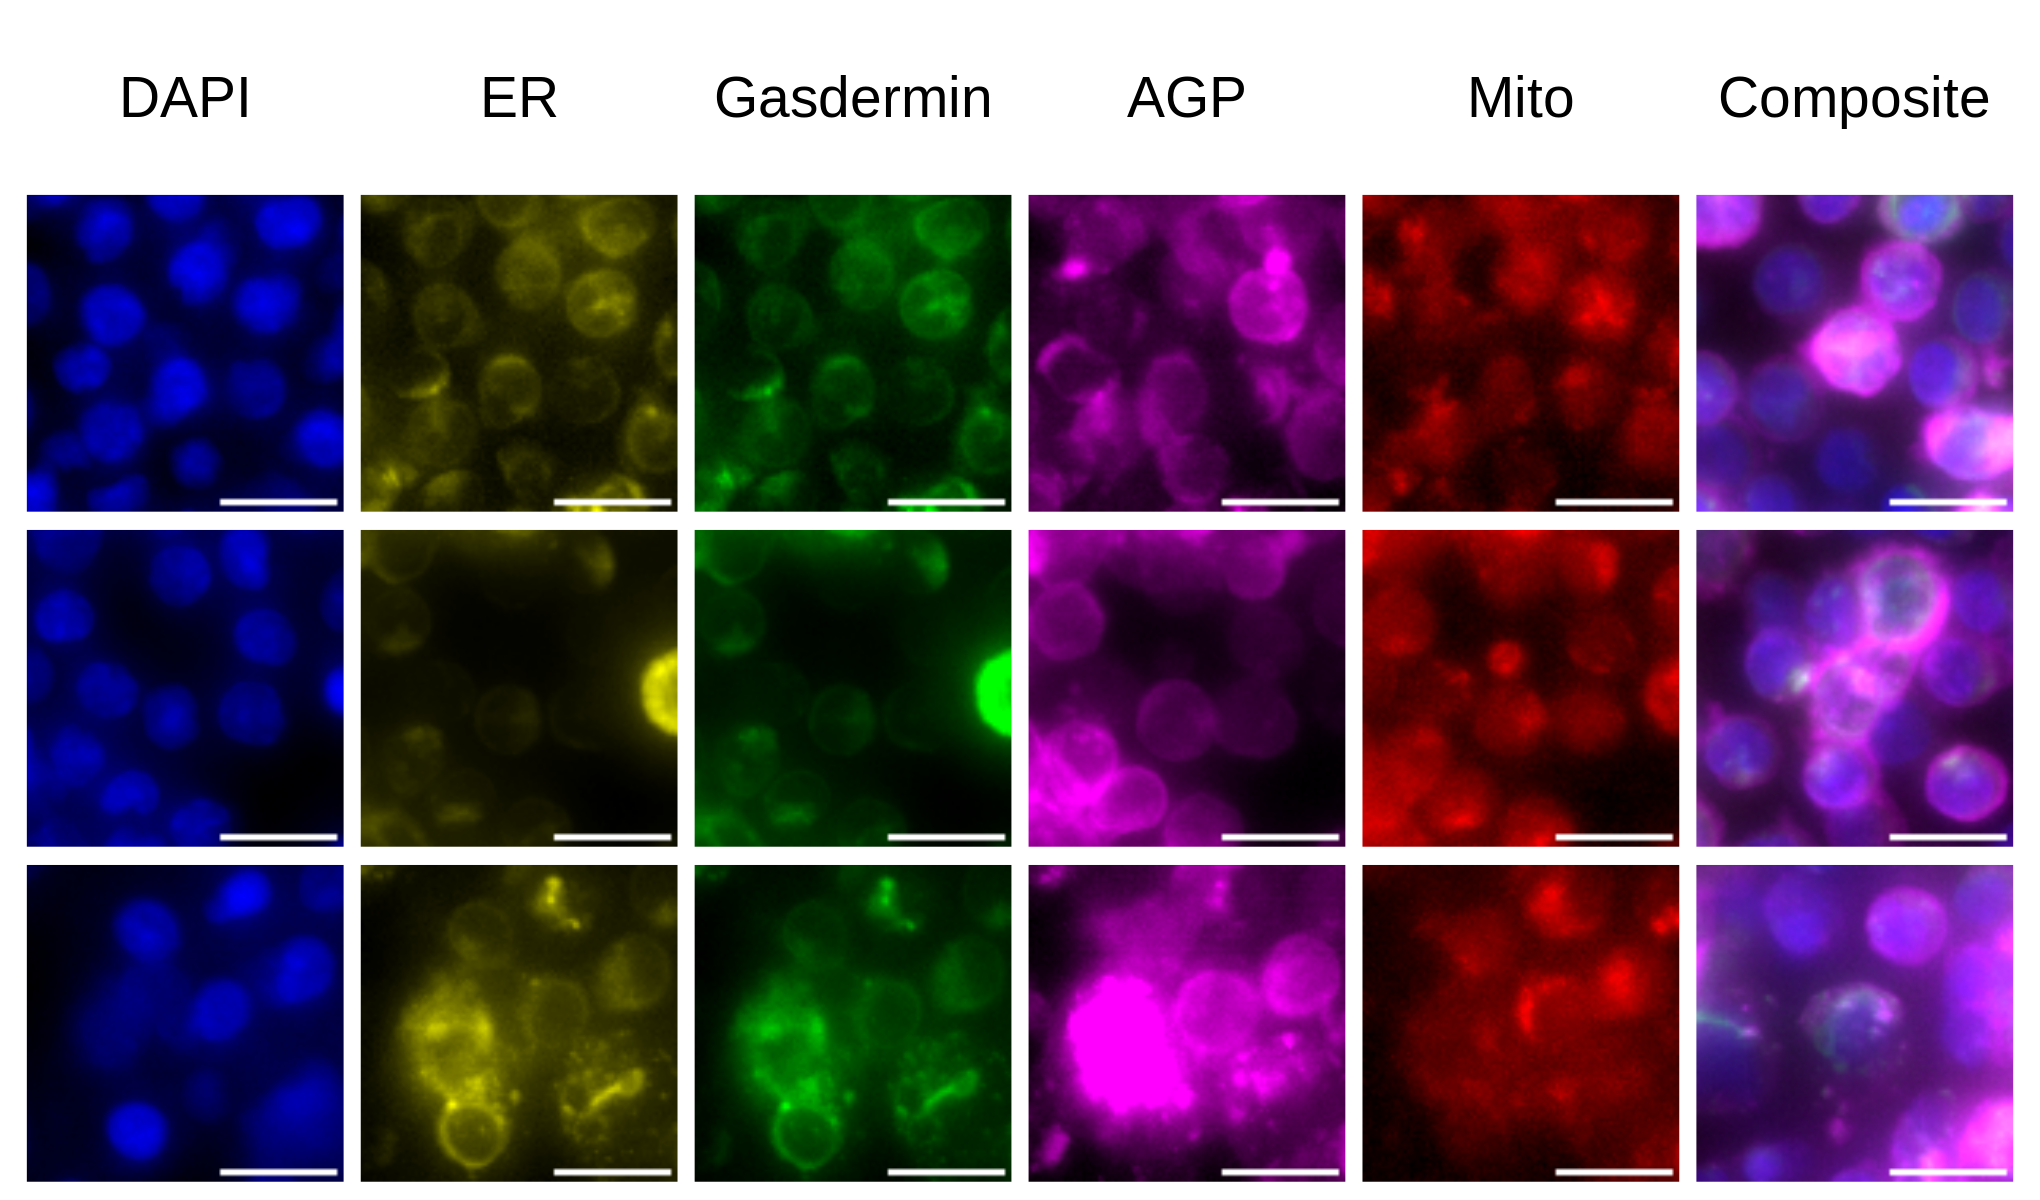

In [20]:
width <- 17
height <- 10

options(repr.plot.width = width, repr.plot.height = height)

# patch the images together
all_plot <- (
    wrap_elements(full = patch_text)
    + wrap_elements(full = control_images)
    + wrap_elements(full = apotosis_images)
    + wrap_elements(full = pyroptosis_images)
    + plot_layout(ncol = 1, widths = c(1, 1, 1, 1), heights = c(0.2, 0.4, 0.4, 0.4))
    )
all_plot

# save plot
ggsave(
    file.path(
        paste0(
            "../figures/",CELL_TYPE,"_montage.png"
        )
    ),
    all_plot, width = width, height = height, dpi = 600
)